<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/97_Projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WTF is Projection

https://youtu.be/YPfUiOMYOEE?t=1011

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


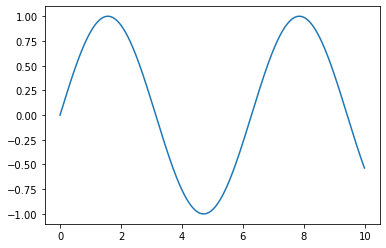

In [ ]:
x = np.arange(0, 10, 0.01)

y = np.sin(x)

plt.plot(x, y)
plt.show()

In [ ]:
input = []

step = 0.1
c = 0
for i in range(100):
  inc = c * step
  y = np.sin(x+inc)
  c += 1
  input.append(y)

In [ ]:
_x = np.array(input)
_x.shape

(100, 1000)

In [ ]:
_y = np.arange(0, 1, 0.01)
_y.shape

(100,)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,),
                   activation='tanh',
                   shuffle=True,
                   random_state = 1,
                   validation_fraction=0.0)

mlp.fit(_x, _y)

MLPRegressor(activation='tanh', random_state=1, validation_fraction=0.0)

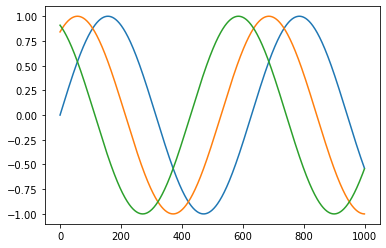

In [ ]:
plt.plot(_x[0])
plt.plot(_x[10])
plt.plot(_x[20])
plt.show()

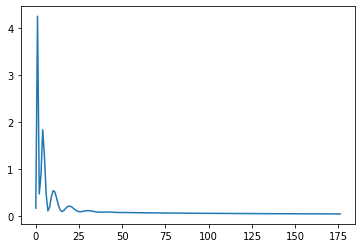

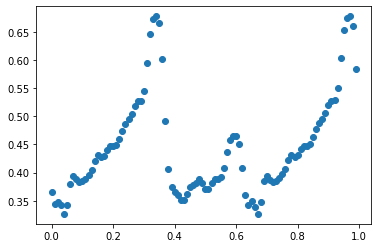

0.07859773608673976

In [ ]:
plt.plot(mlp.loss_curve_)
plt.show()

y_pred = mlp.predict(_x)

plt.scatter(_y, y_pred)
plt.show()

mse = mean_squared_error(_y, y_pred)
mse

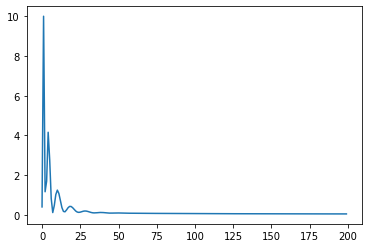

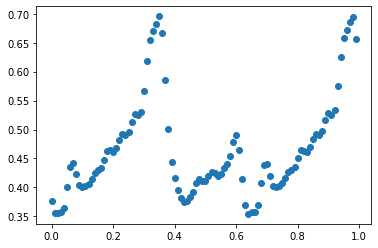

0.07752318066306878

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(200,),
                   activation='tanh',
                   shuffle=True,
                   random_state = 1,
                   n_iter_no_change=100,
                   validation_fraction=0.0)

mlp.fit(_x, _y)

plt.plot(mlp.loss_curve_)
plt.show()

y_pred = mlp.predict(_x)

plt.scatter(_y, y_pred)
plt.show()

mse = mean_squared_error(_y, y_pred)
mse

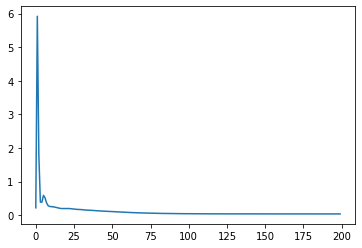

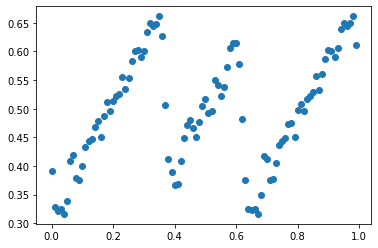

0.07413686802830168

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(200, 20),
                   activation='tanh',
                   shuffle=True,
                   random_state = 1,
                   n_iter_no_change=100,
                   validation_fraction=0.0)

mlp.fit(_x, _y)

plt.plot(mlp.loss_curve_)
plt.show()

y_pred = mlp.predict(_x)

plt.scatter(_y, y_pred)
plt.show()

mse = mean_squared_error(_y, y_pred)
mse

## Egy másik megközelítés

Van egy adatsorom 100 darab 3 hosszú vektor
Ezek alapján akarok becsülni saját magát csak annak egy kicsit módosított változatát.

Vagy egy másik 2 hosszú vektort (amit egyébként a 3 hosszúból állítottam elő)

In [ ]:
a = np.arange(0, 10, 0.5)
b = np.arange(20, 40)
c = np.arange(40, 60)

u = a + b
v = a + c

In [ ]:
_x = np.array([a,b,c]).T
_y = np.array([u,v]).T

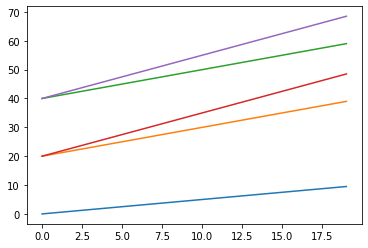

In [ ]:
plt.plot(a); plt.plot(b); plt.plot(c)
plt.plot(u), plt.plot(v); plt.show()

In [ ]:
_x_scaler = MinMaxScaler()
_y_sclaer = MinMaxScaler()

_x_scaled = _x_scaler.fit_transform(_x)
_y_scaled = _y_sclaer.fit_transform(_y)

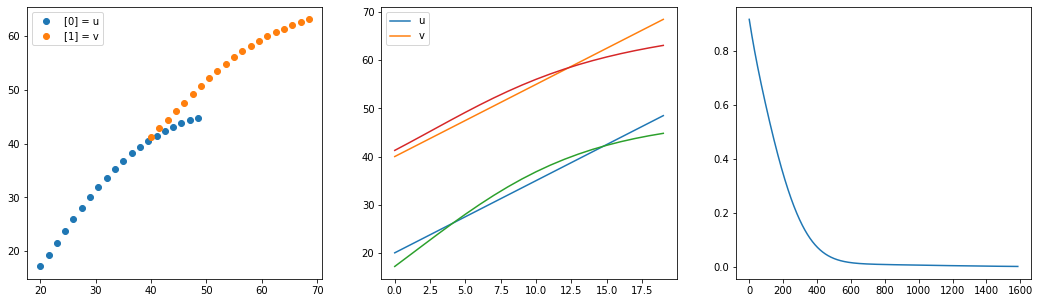

0.004807405245000566

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(3, ),
                   activation='tanh',
                   max_iter=2000,
                   shuffle=True,
                   random_state = 1,
                   n_iter_no_change=1000,
                   validation_fraction=0.0)

mlp.fit(_x_scaled, _y_scaled)

_y_pred = mlp.predict(_x_scaled)
_y_pred_inv = _y_sclaer.inverse_transform(_y_pred)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,5))
ax0.scatter(_y[:,0], _y_pred_inv[:,0], label='[0] = u')
ax0.scatter(_y[:,1], _y_pred_inv[:,1], label='[1] = v')
ax0.legend()
ax1.plot(u, label='u')
ax1.plot(v, label='v')
ax1.plot(_y_pred_inv[:,0])
ax1.plot(_y_pred_inv[:,1])
ax2.plot(mlp.loss_curve_)
ax1.legend()
plt.show()



mse = mean_squared_error(_y_scaled, _y_pred)
mse

In [ ]:
_y_pred.shape

(20, 2)